In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
columns =  ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dev_pt_temp", "radiation", "rain", "snow", "functional"]

df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

df

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [3]:
df.columns = columns
df["functional"] = (df["functional"] == "Yes").astype(int)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dev_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [4]:
df = df[df["hour"] == 12]

df = df.drop(["hour"], axis=1)

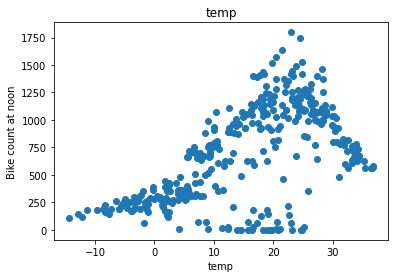

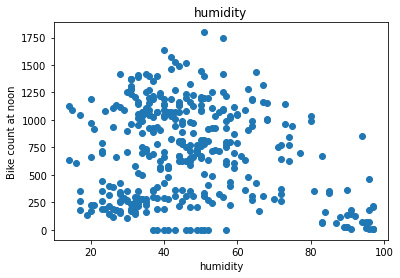

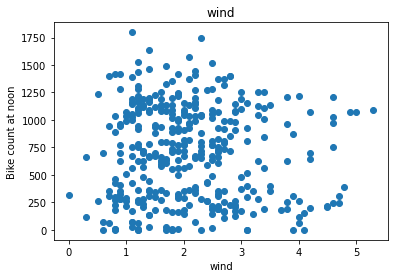

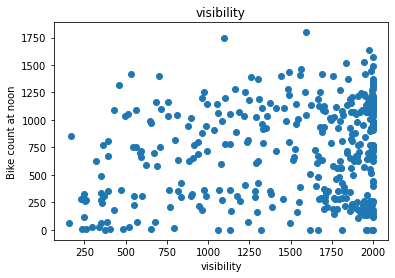

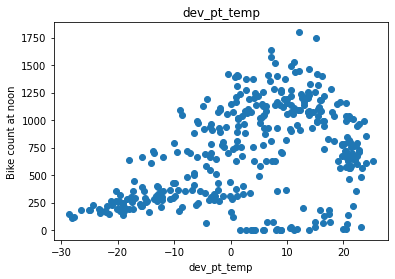

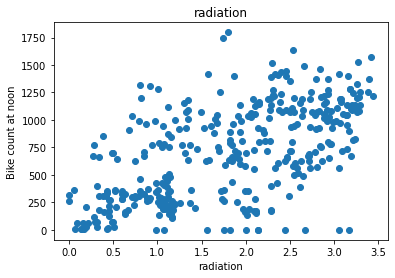

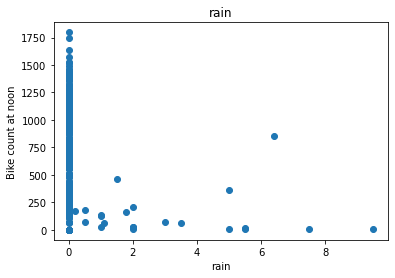

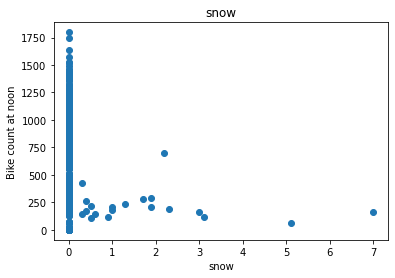

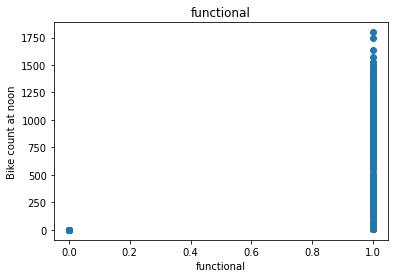

In [5]:
for label in df.columns[1:]:

    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at noon")
    plt.xlabel(label)
    plt.show()

In [6]:
df = df.drop(["wind", "visibility", "functional"], axis = 1)

# Separate train, validation and test datasets

In [7]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def get_xy(dataframe, y_label, x_label):

    dataframe = copy.deepcopy(dataframe)

    if x_label is None:

        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values

    else:

        if len(x_label) == 1:

            X = dataframe[x_label[0]].values.reshape(-1, 1)
        else:

            X = dataframe[x_label].values

    Y = dataframe[y_label].values.reshape(-1, 1)

    data = np.hstack((X,Y))

    return data, X, Y


In [9]:
_, x_ttemp, y_ttemp = get_xy(train, "bike_count", x_label= ["temp"])
_, x_vtemp, y_vtemp = get_xy(val, "bike_count", x_label= ["temp"])
_, x_testemp, y_testemp = get_xy(test, "bike_count", x_label= ["temp"])

In [10]:
temp_reg = LinearRegression()

temp_reg.fit(x_ttemp, y_ttemp)

LinearRegression()

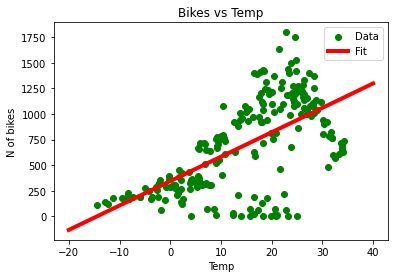

In [11]:
plt.scatter(x_ttemp, y_ttemp, label="Data", color="green")

x = tf.linspace(-20,40,100)

plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=4)

plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("N of bikes")
plt.xlabel("Temp")

plt.show()

# Multiple Linear Regression

In [12]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dev_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [13]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

_, x_trall, y_trall = get_xy(train, "bike_count", x_label= df.columns[1:])
_, x_vall, y_vall = get_xy(val, "bike_count", x_label= df.columns[1:])
_, x_tall, y_tall = get_xy(test, "bike_count", x_label= df.columns[1:])

In [14]:
mult_reg_all = LinearRegression()
mult_reg_all.fit(x_trall, y_trall)

LinearRegression()

In [15]:
mult_reg_all.score(x_tall, y_tall)

0.4885604640276934

# Regression with Neural Net

In [16]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)

temp_normalizer.adapt(x_ttemp.reshape(-1))

In [17]:
temp_nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(1)
    ]
)

In [18]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate =0.1), loss='mean_squared_error')

In [19]:
history = temp_nn_model.fit(
    x_ttemp.reshape(-1,1), y_ttemp,
    verbose = 0,
    epochs = 1000,
    validation_data = (x_vtemp, y_vtemp)
)

In [20]:
def plot_loss(history):

    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

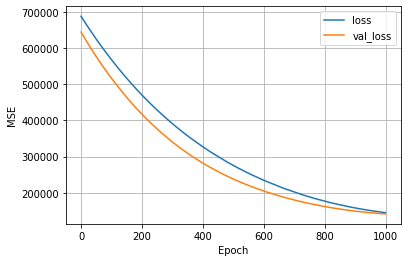

In [21]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


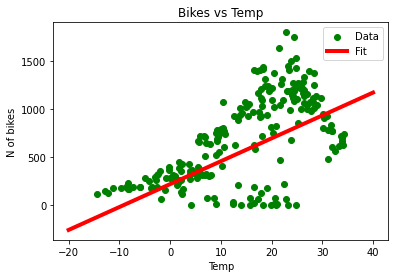

In [22]:
plt.scatter(x_ttemp, y_ttemp, label="Data", color="green")

x = tf.linspace(-20,40,100)

plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=4)

plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("N of bikes")
plt.xlabel("Temp")

plt.show()

# Neural Net

instead of only using one node.

In [23]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_ttemp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [24]:
history = nn_model.fit(
    x_ttemp, y_ttemp,
    validation_data=(x_vtemp, y_vtemp),
    verbose=0, epochs=100
)

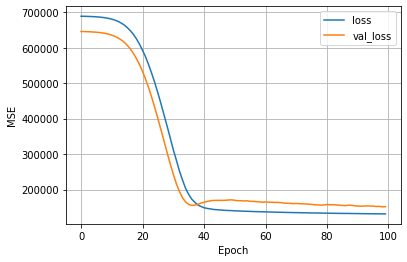

In [25]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


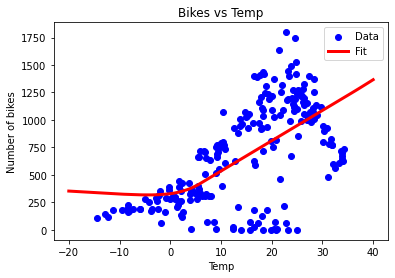

In [26]:
plt.scatter(x_ttemp, y_ttemp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [27]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(x_trall)

In [28]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [29]:
history = nn_model.fit(
    x_ttemp, y_ttemp,
    validation_data=(x_vall, y_vall),
    verbose=0, epochs=100
)       

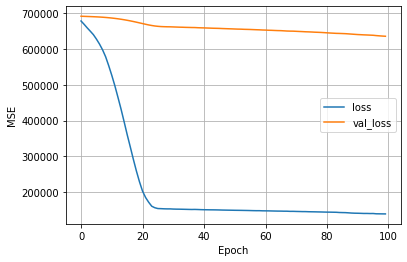

In [30]:
plot_loss(history)

In [31]:
y_pred_lr = mult_reg_all.predict(x_tall)
y_pred_nn = nn_model.predict(x_tall)

3/3 [==============================] - 0s 3ms/step


In [32]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [33]:
MSE(y_pred_lr, y_tall)

97073.06008089382

In [34]:
MSE(y_pred_nn, y_tall)

658429.640718667

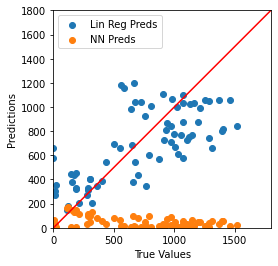

In [35]:
ax = plt.axes(aspect="equal")
plt.scatter(y_tall, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_tall, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")